# Speech Emotion Recognition

## optimized MLP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from ser_helpers import data_manager as dm
import pandas as pd

### Loading Dataframe

In [2]:
data_df = dm.load_df(dm.PATH_DF_NORMAL)

# check if all inputs (mffcs) have the same length
inputs = np.stack(data_df["mfcc"].to_numpy())
n = len(inputs[0])
if not all(len(i) == n for i in inputs):
    raise Exception('Not all inputs have an equal length!')

### Split Data

In [ ]:
# no augmentation

df_train, df_test = train_test_split(data_df, test_size=0.2, random_state=42, shuffle=True)

inputs_train = np.stack(df_train['mfcc'].to_numpy())
targets_train = np.stack(df_train['emotion'].to_numpy())

inputs_test = np.stack(df_test['mfcc'].to_numpy())
targets_test = np.stack(df_test['emotion'].to_numpy())

In [4]:
def build_model():
    # build the network architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(256, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        # 2nd hidden layer
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        # 3rd hidden layer
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(8, activation="softmax")
    ])
    return model

In [10]:
# model = build_model()
#
# # compile network
# optimizer = keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(
#     optimizer=optimizer,
#     loss="sparse_categorical_crossentropy",
#     metrics=["accuracy"]
# )
#
# model.summary()
#
# history = model.fit(
#     inputs_train,
#     targets_train,
#     validation_data=(inputs_test, targets_test),
#     epochs=130,
#     batch_size=64
# )
#
# test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
# print("Accuracy on test set is: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1703)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                109056    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 520       
Total params: 117,896
Trainable params: 117,896
Non-trainable params: 0
_________________________________________________________________


In [11]:
# calc average performance

acc_list = []

for i in range(1, 21):
    model = build_model()

    # compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # model.summary()

    history = model.fit(
        inputs_train,
        targets_train,
        validation_data=(inputs_test, targets_test),
        epochs=120,
        batch_size=64,
        verbose=0
    )

    # evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(inputs_test, targets_test, verbose=1)
    print("Accuracy on test set is: {}".format(str(round(100 * test_accuracy, 2))))

    if test_accuracy > 0.57:
        model.save("../models/mlp_top_performing_run{}.h5".format(i))
        print("Model saved in run {}".format(i))

    acc_list.append(str(round(100 * test_accuracy, 2)))

Train on 1152 samples, validate on 288 samples
Epoch 1/50
1152/1152 [==============================] - 1s 551us/sample - loss: 66.6249 - accuracy: 0.1380 - val_loss: 21.8991 - val_accuracy: 0.2153
Epoch 2/50
1152/1152 [==============================] - 0s 104us/sample - loss: 15.4070 - accuracy: 0.1719 - val_loss: 11.2202 - val_accuracy: 0.1944
Epoch 3/50
1152/1152 [==============================] - 0s 100us/sample - loss: 11.1673 - accuracy: 0.2118 - val_loss: 8.8347 - val_accuracy: 0.2222
Epoch 4/50
1152/1152 [==============================] - 0s 117us/sample - loss: 8.7480 - accuracy: 0.2509 - val_loss: 7.9146 - val

In [7]:
def plot_history(history):

    plt.style.use('default')
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Präzision")
    axs[0].set_xlabel("Epoche")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoche")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Evaluation")

    plt.tight_layout()
    plt.show()
    # plt.savefig('../plots/mlp_150_epochs_optimized_structure_with_anti_overfit2.png')

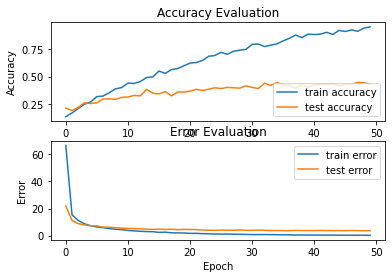

In [12]:
plot_history(history)

In [13]:
# x = inputs_test[42:52]
# emo = targets_test[42:52]
#
# print(model.predict_classes(x))
# print(emo)


288/288 [==============================] - 0s 83us/sample - loss: 3.6333 - accuracy: 0.4340
Accuracy on test set is: 0.4340277910232544
